<a href="https://colab.research.google.com/github/HesamoddinHosseini/Student-engagement/blob/main/CNN(1)_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SEYED HESAMODDIN HOSSEINI**

***Student Engagement (Link Dataset)***:https://www.kaggle.com/datasets/joyee19/studentengagement/data

Libraries

In [1]:
import os
import shutil
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Concatenate, Flatten, Dense
from tensorflow.keras import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Datasets and Dataloaders

In [5]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd drive/MyDrive/Student-engagement-dataset

/content/drive/MyDrive/Student-engagement-dataset


In [7]:
data_dir = '/content/drive/MyDrive/Student-engagement-dataset/'

In [8]:
os.listdir(data_dir)

['Engaged', 'Not engaged', '.ipynb_checkpoints']

In [9]:
data_path = data_dir
target_path = '/content/target'

In [10]:
train_dir = os.path.join(target_path, 'train')
test_dir = os.path.join(target_path, 'test')
valid_dir = os.path.join(target_path, 'validation')

os.makedirs(target_path,exist_ok=True)
os.makedirs(train_dir,exist_ok=True)
os.makedirs(test_dir,exist_ok=True)
os.makedirs(valid_dir,exist_ok=True)

In [11]:
img_size = (256, 256)
for path_ in os.listdir(data_path):
    main_class_dir = os.path.join(data_path, path_)
    for subclass_name in os.listdir(main_class_dir):
        subclass_dir = os.path.join(main_class_dir, subclass_name)

        img_count = len(os.listdir(subclass_dir))                              # Get images count in each class
        test_img_count = int(0.2*img_count)                                    # Number of test images
        train_img_count = img_count - test_img_count                           # Number of train images


        target_train_class_dir = os.path.join(train_dir, subclass_name)
        target_test_class_dir = os.path.join(test_dir, subclass_name)
        target_valid_class_dir = os.path.join(valid_dir, subclass_name)

        os.makedirs(target_train_class_dir,exist_ok=True)                      # Create train directory path
        os.makedirs(target_test_class_dir,exist_ok=True)                       # Create test directory path
        os.makedirs(target_valid_class_dir,exist_ok=True)                       # Create validation directory path

        for file_name in os.listdir(subclass_dir):
            img = cv2.imread(os.path.join(subclass_dir, file_name))
            img = cv2.resize(img, img_size)                                    # Resize image to 224 x 224
            img = img / 255.0                                                  # Normalize pixel values to [0, 1]

            if len(os.listdir(target_test_class_dir)) != test_img_count:
                cv2.imwrite(os.path.join(target_test_class_dir, file_name), img)
            else:
                cv2.imwrite(os.path.join(target_train_class_dir, file_name), img)

In [12]:
for class_folder in os.listdir(train_dir):
    train_class_dir = os.path.join(train_dir, class_folder)
    valid_class_dir = os.path.join(valid_dir, class_folder)

    train_ = os.path.join(target_path,'Train')
    os.makedirs(train_,exist_ok=True)
    new_class_dir = os.path.join(train_,class_folder)
    os.makedirs(new_class_dir,exist_ok=True)

    img_count =  len(os.listdir(train_class_dir))                           # Get images coount in each class
    valid_img_count = int(0.2*img_count)                                    # Number of validation images
    train_img_count = img_count - valid_img_count                           # Number of train images

    for file_name in os.listdir(train_class_dir):
        img = cv2.imread(os.path.join(train_class_dir, file_name))
        if len(os.listdir(valid_class_dir)) != valid_img_count:
            cv2.imwrite(os.path.join(valid_class_dir, file_name), img)
        else:
            cv2.imwrite(os.path.join(new_class_dir, file_name), img)

shutil.rmtree(train_dir)
train_dir = train_

In [13]:
batch_size = 32
img_size = (256, 256,3)

train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=batch_size,
        class_mode = 'categorical',
        shuffle=True)


val_generator = val_datagen.flow_from_directory(
        valid_dir,
        batch_size=batch_size,
        class_mode = 'categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        batch_size=batch_size,
        class_mode = 'categorical',
        shuffle=True)

print(train_generator.class_indices)

Found 1362 images belonging to 6 classes.
Found 337 images belonging to 6 classes.
Found 421 images belonging to 6 classes.
{'Looking Away': 0, 'bored': 1, 'confused': 2, 'drowsy': 3, 'engaged': 4, 'frustrated': 5}


In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=img_size),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Dropout(0.8),



    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Dropout(0.8),

    keras.layers.Flatten(),

    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.7),

    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.7),

    keras.layers.Dense(6, activation='softmax')
])
model.summary()

model.compile(optimizer=Adam() ,loss="categorical_crossentropy", metrics = ['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 84, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 84, 84, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 27, 27, 128)       0

In [15]:
checkpoint = ModelCheckpoint("Student Engagement Model.h5", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=9, verbose=1, mode='auto')


history = model.fit(train_generator, validation_data= val_generator,
                           epochs=30,callbacks=[checkpoint,early_stopping])

Epoch 1/30
43/43 [==============================] - ETA: 0s - loss: 4.1399 - accuracy: 0.4537
Epoch 1: val_accuracy improved from -inf to 0.35015, saving model to Student Engagement Model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - 390s 9s/step - loss: 4.1399 - accuracy: 0.4537 - val_loss: 1.7184 - val_accuracy: 0.3501
Epoch 2/30
43/43 [==============================] - ETA: 0s - loss: 0.6471 - accuracy: 0.7364
Epoch 2: val_accuracy improved from 0.35015 to 0.84570, saving model to Student Engagement Model.h5
43/43 [==============================] - 396s 9s/step - loss: 0.6471 - accuracy: 0.7364 - val_loss: 1.3172 - val_accuracy: 0.8457
Epoch 3/30
43/43 [==============================] - ETA: 0s - loss: 0.3672 - accuracy: 0.8605
Epoch 3: val_accuracy improved from 0.84570 to 0.94955, saving model to Student Engagement Model.h5
43/43 [==============================] - 364s 8s/step - loss: 0.3672 - accuracy: 0.8605 - val_loss: 0.6368 - val_accuracy: 0.9496
Epoch 4/30
43/43 [==============================] - ETA: 0s - loss: 0.2189 - accuracy: 0.9178
Epoch 4: val_accuracy did not improve from 0.94955
43/43 [==============================] - 361s 8s/step - loss: 0.2189 - accura

In [16]:
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

14/14 [==============================] - 26s 2s/step - loss: 0.2406 - accuracy: 0.9192
Test Loss: 0.2406
Test Accuracy: 0.9192


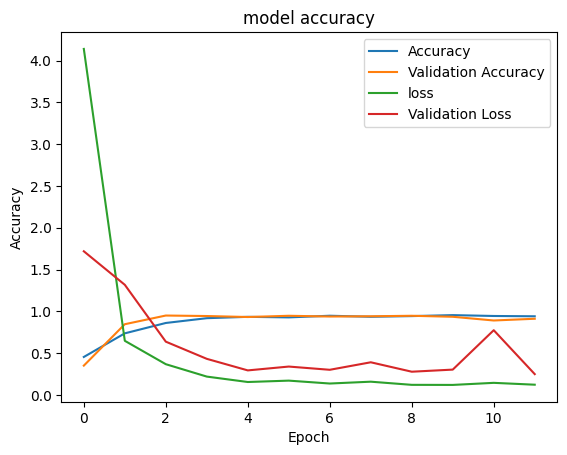

In [17]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()